<div style="text-align: center;">
  <h1>SALES PREDICTION USING PYTHON</h1>
</div>

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
#from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [27]:
df = pd.read_csv('/dataset.csv', encoding='ISO-8859-1')
df.head()

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


In [28]:
df.drop(columns=['customer name', 'customer e-mail', 'country', 'gender'], inplace=True)

In [29]:
df.info()
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  500 non-null    float64
 1   annual Salary        500 non-null    float64
 2   credit card debt     500 non-null    float64
 3   net worth            500 non-null    float64
 4   car purchase amount  500 non-null    float64
dtypes: float64(5)
memory usage: 19.7 KB


age                    0
annual Salary          0
credit card debt       0
net worth              0
car purchase amount    0
dtype: int64

In [30]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Preprocessing

In [31]:
scale = MinMaxScaler()
X = scale.fit_transform(X)
y = scale.fit_transform(y.values.reshape(-1, 1))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

# Linear regrssion

In [32]:
#Trying linear regression
lreg = LinearRegression()
lreg.fit(X_train, y_train)
print('Train score', lreg.score(X_train, y_train))
print('Test score', lreg.score(X_test, y_test))

Train score 0.9999999827018735
Test score 0.9999999732151008


# ANN Model

In [49]:
ann = Sequential([Dense(25, activation="relu"),
                 Dense(10, activation='relu'),
                 Dense(1, activation='linear')])

ann.compile(optimizer='adam',
            loss='mean_squared_error',
            metrics=['mean_absolute_error'])


history = ann.fit(X_train, y_train, epochs=50, validation_split=0.2)

Epoch 1/50
10/10 [==============================] - 1s 23ms/step - loss: 0.3329 - mean_absolute_error: 0.5534 - val_loss: 0.2859 - val_mean_absolute_error: 0.5008
Epoch 2/50
10/10 [==============================] - 0s 5ms/step - loss: 0.2302 - mean_absolute_error: 0.4552 - val_loss: 0.1958 - val_mean_absolute_error: 0.4066
Epoch 3/50
10/10 [==============================] - 0s 5ms/step - loss: 0.1525 - mean_absolute_error: 0.3648 - val_loss: 0.1326 - val_mean_absolute_error: 0.3269
Epoch 4/50
10/10 [==============================] - 0s 5ms/step - loss: 0.1029 - mean_absolute_error: 0.2919 - val_loss: 0.0939 - val_mean_absolute_error: 0.2691
Epoch 5/50
10/10 [==============================] - 0s 5ms/step - loss: 0.0690 - mean_absolute_error: 0.2338 - val_loss: 0.0636 - val_mean_absolute_error: 0.2137
Epoch 6/50
10/10 [==============================] - 0s 5ms/step - loss: 0.0429 - mean_absolute_error: 0.1779 - val_loss: 0.0403 - val_mean_absolute_error: 0.1595
Epoch 7/50
10/10 [=========

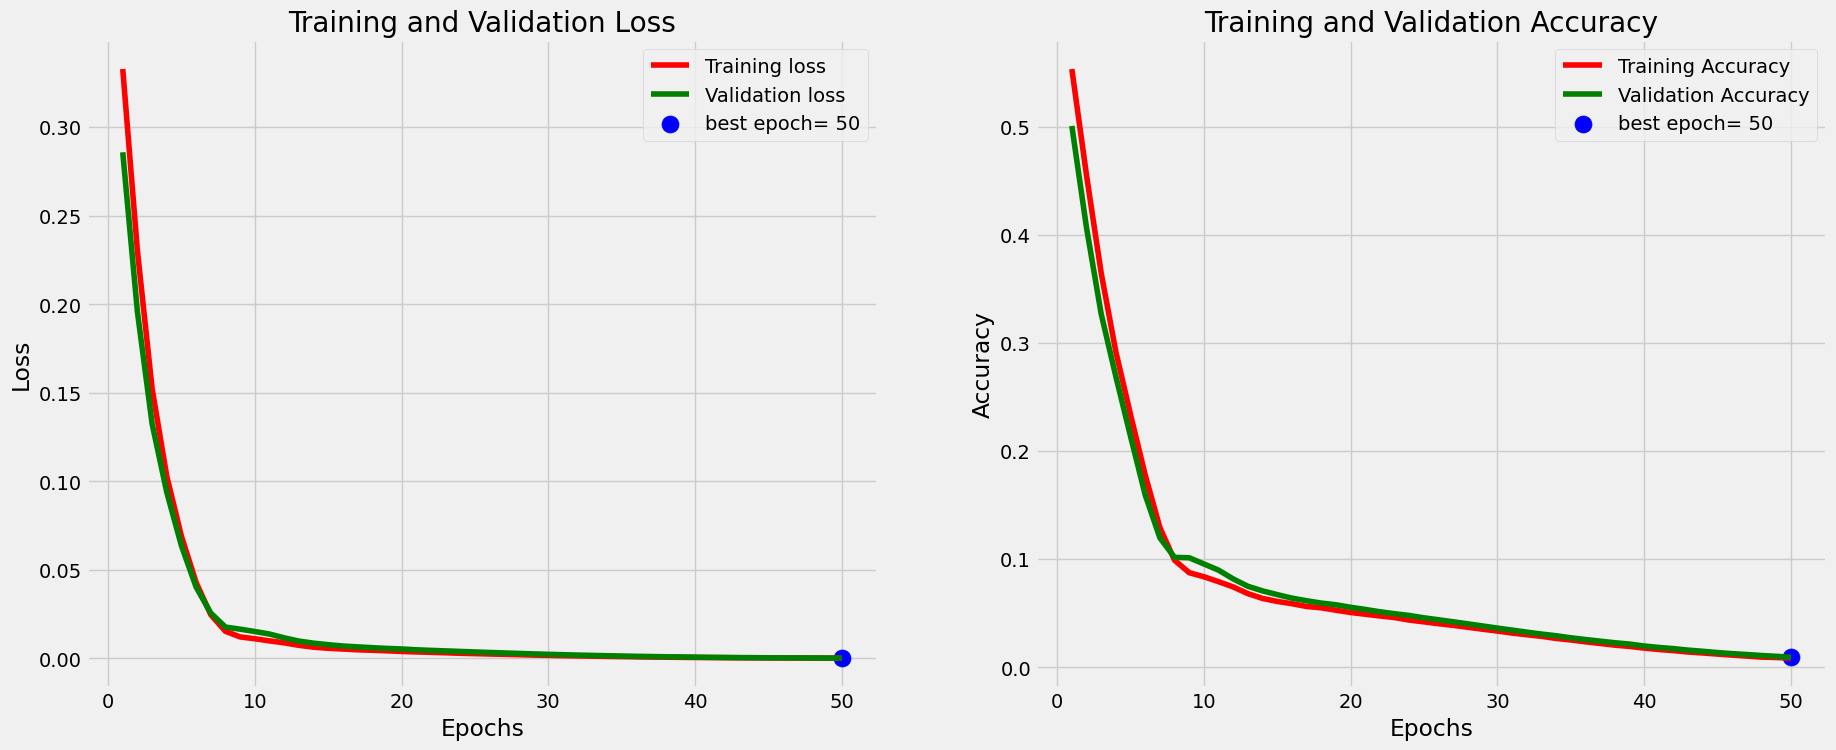

In [50]:
tr_acc = history.history['mean_absolute_error']
tr_loss = history.history['loss']
val_acc = history.history['val_mean_absolute_error']
val_loss = history.history['val_loss']
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
index_acc = np.argmin(val_acc)
acc_highest = val_acc[index_acc]
Epochs = [i+1 for i in range(len(tr_acc))]
loss_label = f'best epoch= {str(index_loss + 1)}'
acc_label = f'best epoch= {str(index_acc + 1)}'

plt.figure(figsize= (20, 8))
plt.style.use('fivethirtyeight')

plt.subplot(1, 2, 1)
plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(Epochs, tr_acc, 'r', label= 'Training Accuracy')
plt.plot(Epochs, val_acc, 'g', label= 'Validation Accuracy')
plt.scatter(index_acc + 1 , acc_highest, s= 150, c= 'blue', label= acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout
plt.show()

In [51]:
y_pred = ann.predict(X_test)

4/4 [==============================] - 0s 2ms/step


In [52]:
r2 = r2_score(y_test, y_pred)
print('R2 score:', r2)

R2 score: 0.9896659423444019
